In [2]:
import torch
import torch.nn as nn
import numpy as np

## Pytorch RNN Layer

Here's a breakdown of the parameters:

* **input_size = 2**: This specifies that each input sequence element (or timestep) will have a feature size of 2. In other words, the input tensor to this layer will have a shape like (batch_size, sequence_length, 2) where 2 is the feature size for each element in the sequence.

* **hidden_size = 3**: This denotes that the hidden state of the RNN will have a size of 3. The hidden state is the internal state or memory of the RNN, and its size can be thought of as the 'width' or 'capacity' of the RNN's memory at each timestep. When the RNN processes an input, it updates its hidden state based on both the current input and the previous hidden state. This allows the RNN to maintain a form of 'memory' of past inputs in the sequence.

* **batch_first=True**: This argument ensures that the expected input tensor shape is (batch_size, sequence_length, input_size). By default, the RNN module in PyTorch expects inputs to have a shape of (sequence_length, batch_size, input_size), but batch_first=True modifies this expectation to be more in line with what's commonly used in other deep learning frameworks and for easier handling.

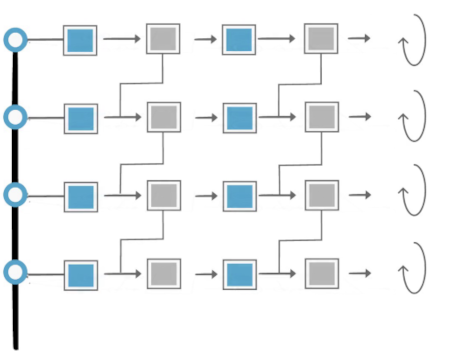

In [4]:
rnn_layer = nn.RNN(input_size=2, hidden_size=3, batch_first=True)
rnn_layer

RNN(2, 3, batch_first=True)

In [6]:
# Lets look at the paramaters of the RNN
w_ih = rnn_layer.weight_ih_l0 # Input layer weight batch size is 1 so, (3,2) where 3 is hidden layer neuron and 2 is input featues
w_hh = rnn_layer.weight_hh_l0 # Hidden layer weight with hidden state, agin batch size is 1 so, (3,3) where 3 is hidden state feature and 3 is hidden layer feature
b_ih = rnn_layer.bias_ih_l0 # Bias is (3) hidden layer feature
b_hh = rnn_layer.bias_hh_l0 # Bias is (3) hidden state feature

w_ih, w_hh, b_ih, b_hh

(Parameter containing:
 tensor([[ 0.4672,  0.0652],
         [ 0.1774, -0.2489],
         [-0.5545, -0.2021]], requires_grad=True),
 Parameter containing:
 tensor([[-0.4119,  0.3826,  0.1918],
         [ 0.5133, -0.4044, -0.2746],
         [-0.4358,  0.4373, -0.0737]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2041, -0.0866,  0.0087], requires_grad=True),
 Parameter containing:
 tensor([-0.4366, -0.5244, -0.1452], requires_grad=True))

In [9]:
input_seq = torch.tensor([[1.0]*2, [2.0]*2, [3.0]*2, [4.0]*2])
input_seq # Random sequence, where there are 4 time step and each token in a timestep has 2 feature so (4,2)

tensor([[1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.]])

In [10]:
input_seq.shape

torch.Size([4, 2])

In [11]:
input_batch = input_seq.unsqueeze(0) # Batch size is 1 so, (1,4,2)
input_batch.shape

torch.Size([1, 4, 2])

In [12]:
# Forward pass
output, hidden = rnn_layer(input_batch)
output, hidden

(tensor([[[ 0.2912, -0.5932, -0.7129],
          [ 0.3351, -0.1674, -0.9628],
          [ 0.7521, -0.3109, -0.9880],
          [ 0.8561, -0.1136, -0.9984]]], grad_fn=<TransposeBackward1>),
 tensor([[[ 0.8561, -0.1136, -0.9984]]], grad_fn=<StackBackward0>))

## RNN forward pass from scratch

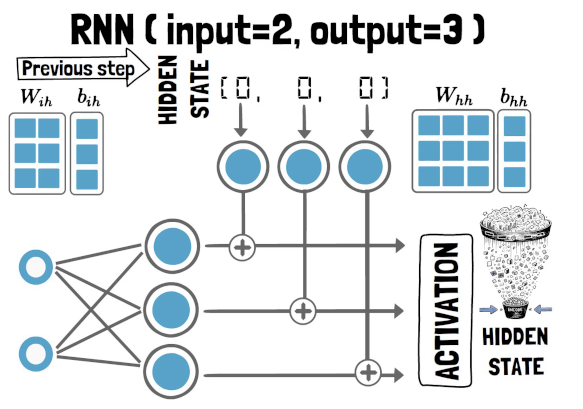

In [13]:
states = [torch.zeros(3)] # Store the hidden states so that it can be passed to next time step, initial hidden state for 1st time step is 0s tensor
for t in range(0,4): # 4 time step
  print("Time step: ", t)
  xt = input_seq[t]
  ht = torch.matmul(xt, torch.transpose(w_ih, 0, 1)) + b_ih # Hidden layer caluclation
  ot = ht + torch.matmul(states[t], torch.transpose(w_hh, 0, 1)) + b_hh # Hidden State calculation
  ot = torch.tanh(ot) # Non linearity
  states.append(ot) # Save final output so that it can act as next timestep hidden
  print(" Weighted sum with input: ", ht)
  print(" Output: ", ot)

Time step:  0
 Weighted sum with input:  tensor([ 0.7364, -0.1581, -0.7479], grad_fn=<AddBackward0>)
 Output:  tensor([ 0.2912, -0.5932, -0.7129], grad_fn=<TanhBackward0>)
Time step:  1
 Weighted sum with input:  tensor([ 1.2688, -0.2297, -1.5046], grad_fn=<AddBackward0>)
 Output:  tensor([ 0.3351, -0.1674, -0.9628], grad_fn=<TanhBackward0>)
Time step:  2
 Weighted sum with input:  tensor([ 1.8012, -0.3012, -2.2612], grad_fn=<AddBackward0>)
 Output:  tensor([ 0.7521, -0.3109, -0.9880], grad_fn=<TanhBackward0>)
Time step:  3
 Weighted sum with input:  tensor([ 2.3335, -0.3727, -3.0179], grad_fn=<AddBackward0>)
 Output:  tensor([ 0.8561, -0.1136, -0.9984], grad_fn=<TanhBackward0>)


## LSTM Cell

LSTMs are a special kind of recurrent neural network (RNN) that are particularly effective at learning and remembering over long sequences and are less susceptible to the vanishing gradient problem.
The forward pass through the LSTM returns two items:

* **output**: This tensor contains the LSTM's output for each timestep in the input sequence for each batch, exactly as a regular RNN layer.

* **(hidden_state, cell_state)**: This is a tuple containing the final hidden and cell states for the LSTM. The hidden state can be thought of as the LSTM's memory of the most recent timestep, while the cell state is a longer-term memory.

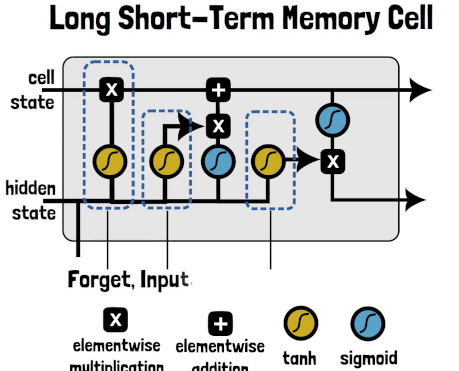

In [14]:
lstm_layer = nn.LSTM(input_size=2, hidden_size=3, batch_first=True)

# Forward Pass
output, (hidden_state, cell_state) = lstm_layer(input_seq)
output, hidden_state, cell_state

(tensor([[ 0.0916, -0.0168,  0.1602],
         [ 0.2980, -0.0615,  0.1296],
         [ 0.5518, -0.0867,  0.0826],
         [ 0.7639, -0.0908,  0.0501]], grad_fn=<SqueezeBackward1>),
 tensor([[ 0.7639, -0.0908,  0.0501]], grad_fn=<SqueezeBackward1>),
 tensor([[ 1.1674, -0.1426,  0.8071]], grad_fn=<SqueezeBackward1>))